In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("../data/train.csv") 
train["일시"] = pd.to_datetime(train["일시"])

## 상관성

In [4]:
train.corr()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,1.000000,0.048746,0.059160,-0.035892,0.017028,-0.231132,-0.043132,0.032915,0.096560,0.043902,0.056060
최고기온,0.048746,1.000000,0.962800,0.182124,0.199181,0.306831,-0.227349,0.065647,0.435789,-0.125889,0.989550
최저기온,0.059160,0.962800,1.000000,-0.090348,0.262262,0.442864,-0.185666,-0.116589,0.275586,-0.297435,0.989342
일교차,-0.035892,0.182124,-0.090348,1.000000,-0.277819,-0.480859,-0.162518,0.667646,0.605145,0.618956,0.047032
강수량,0.017028,0.199181,0.262262,-0.277819,1.000000,0.419573,0.014620,-0.282140,-0.279404,-0.288100,0.237996
평균습도,-0.231132,0.306831,0.442864,-0.480859,0.419573,1.000000,-0.111925,-0.593880,-0.420109,-0.638990,0.376363
평균풍속,-0.043132,-0.227349,-0.185666,-0.162518,0.014620,-0.111925,1.000000,0.054689,0.052315,0.058784,-0.209055
일조합,0.032915,0.065647,-0.116589,0.667646,-0.282140,-0.593880,0.054689,1.000000,0.788449,0.965636,-0.029601
일사합,0.096560,0.435789,0.275586,0.605145,-0.279404,-0.420109,0.052315,0.788449,1.000000,0.636781,0.355682
일조율,0.043902,-0.125889,-0.297435,0.618956,-0.288100,-0.638990,0.058784,0.965636,0.636781,1.000000,-0.218212


## 산점도 확인

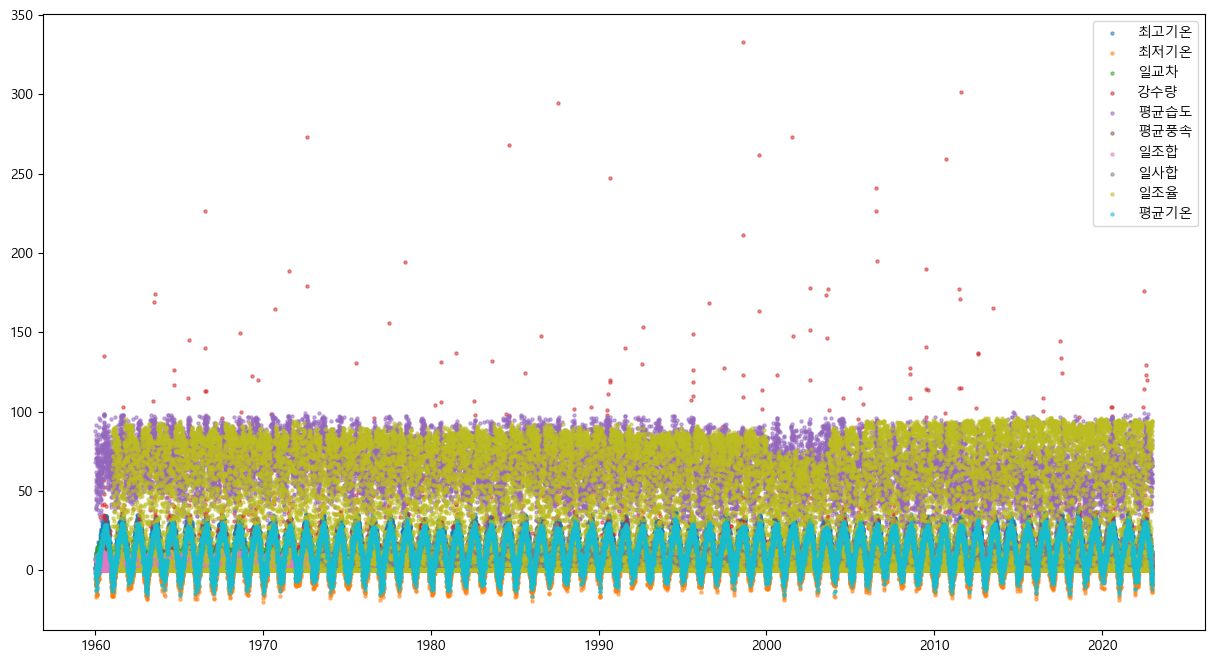

In [5]:
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] ='Malgun Gothic'
for col in train.columns[1:]:
    plt.scatter(x="일시", y=col, data=train, alpha=.5, cmap="hsv", s=5)
    plt.legend()
plt.show()

In [6]:
train.describe()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23011,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,1991-07-02 00:00:00,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
min,1960-01-01 00:00:00,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,1975-10-01 12:00:00,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,1991-07-02 00:00:00,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,2007-04-01 12:00:00,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,2022-12-31 00:00:00,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000
std,NaN,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515


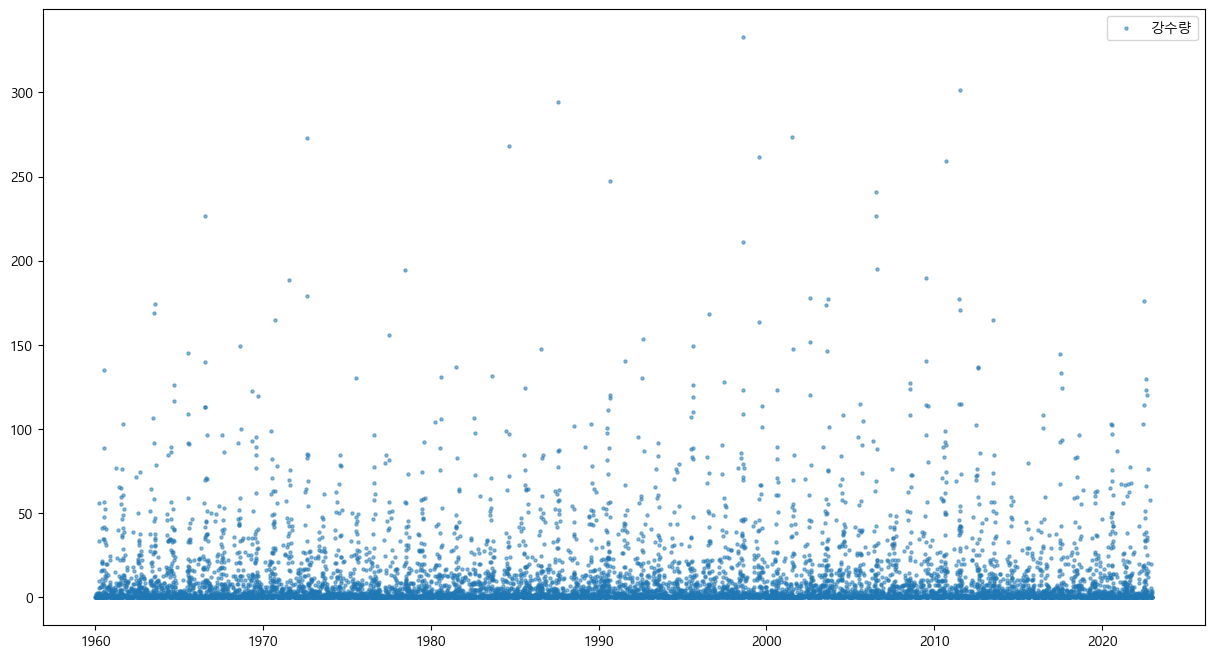

In [7]:
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.scatter(x="일시", y="강수량", data=train, alpha=.5, cmap="hsv", s=5)
plt.legend()
plt.show()

## 결측치 확인

In [8]:
train.isna().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [9]:
train.isna().sum()/len(train)

일시      0.000000
최고기온    0.000130
최저기온    0.000130
일교차     0.000174
강수량     0.602364
평균습도    0.000000
평균풍속    0.000174
일조합     0.005128
일사합     0.211290
일조율     0.015905
평균기온    0.000000
dtype: float64

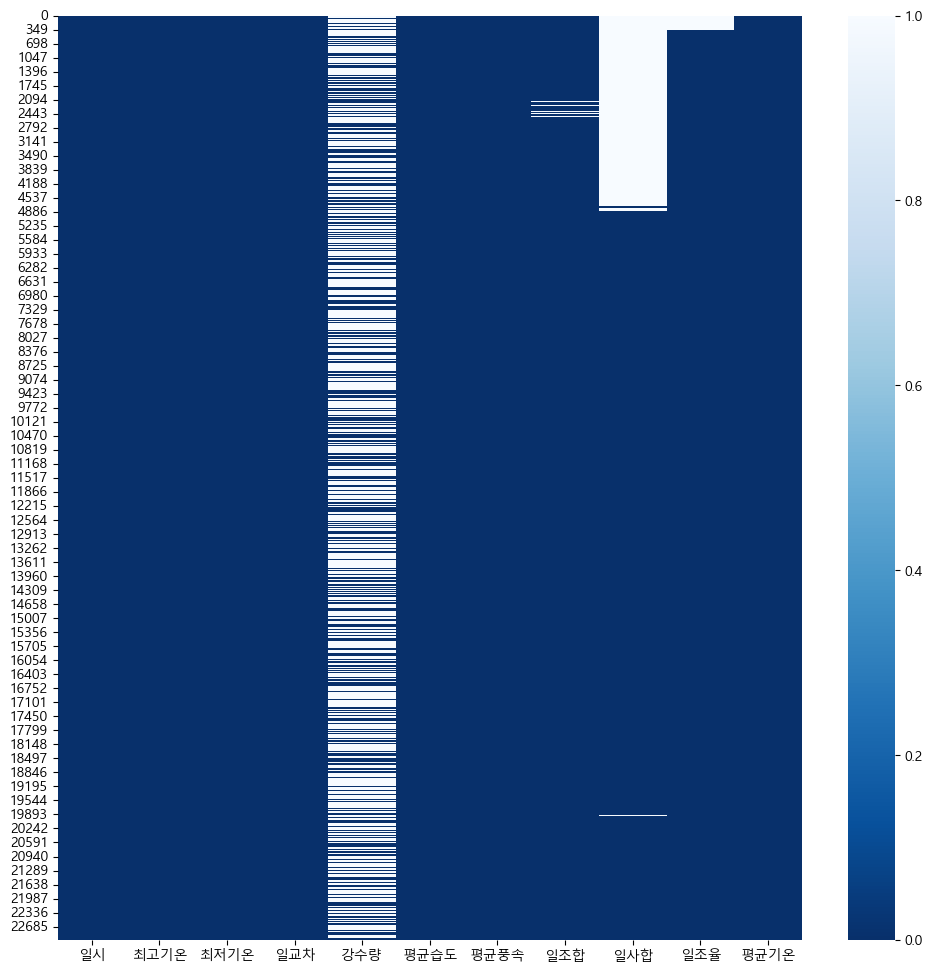

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(train.isna(), cmap="Blues_r")
plt.show()

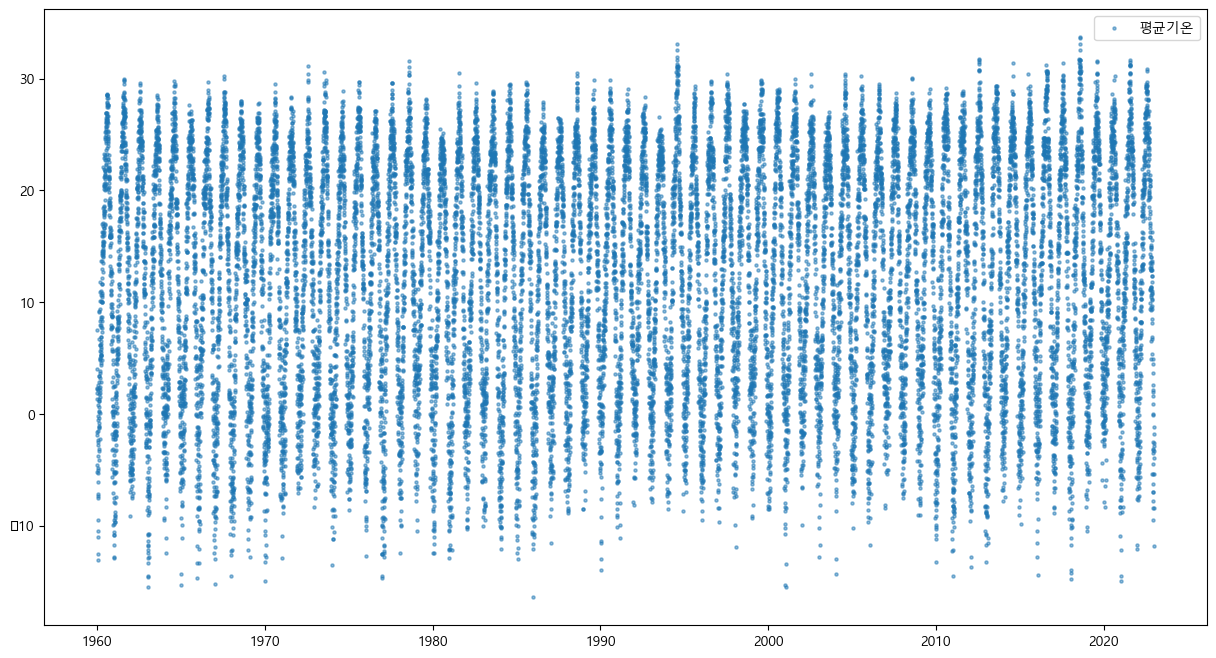

In [11]:
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.scatter(x="일시", y="평균기온", data=train, alpha=.5, cmap="hsv", s=5)
plt.legend()
plt.show()